# Homework 4: Text Classification

In this homework, you will work with a dataset composed of the posts from Tweetter. The goal is to identify if there is an emergency information in the tweet or not. This is a binary classification task.

\

We will use a dataset from Kaggle contest: https://www.kaggle.com/competitions/nlp-getting-started/data Download train.csv and test.csv files. The code below will split the first file into train and validation sets.

In [667]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [668]:
data = pd.read_csv('train.csv')

In [669]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Q1 (1pt)

Print information about missing values. Fill in missing values with an empty string [Example in SGD notebook](https://github.com/anton-selitskiy/RIT_ML/blob/main/SGD.ipynb)

In [670]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [671]:
data.fillna('', inplace=True)

In [672]:
data.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [673]:
data.head()

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1


Now we will split our data into Test, Validation, and Test sets. You don't want to use Test set untill Q10.

In [674]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(data, test_size=0.3, random_state=42)

In [675]:
validation, test = train_test_split(validation, test_size=0.4, random_state=42)

data.head()

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1


## Q2 (2pt)

1. What is the distribution of the classes in the Training set?

2. Plot the bar-plot for 10 mostly frequent values in column "keyword".

Comment on the information you've seen. [EDA notbook could be helpful](https://github.com/anton-selitskiy/RIT_ML/blob/main/EDA_and_Pipeline1.ipynb)

Class Distribution in Training Set:
0    3024
1    2305
Name: target, dtype: int64


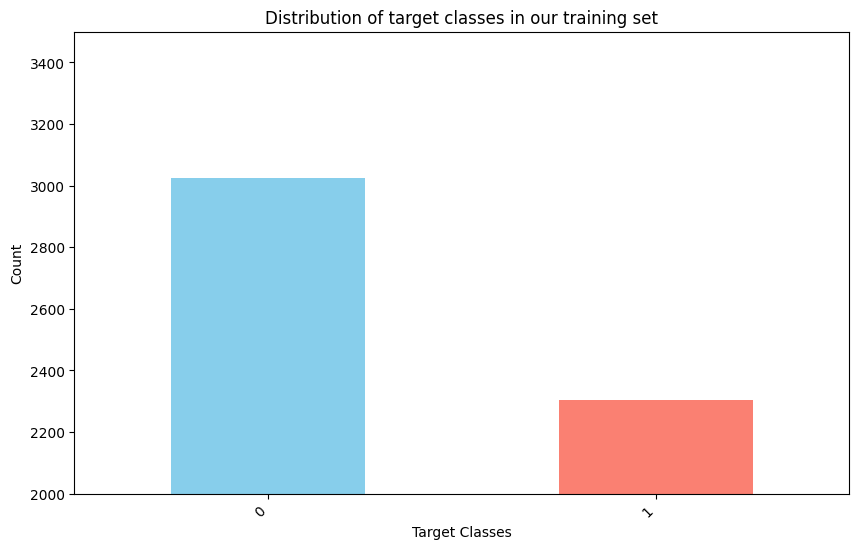

In [676]:
class_distribution = train['target'].value_counts()
print("Class Distribution in Training Set:")
print(class_distribution)

plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Distribution of target classes in our training set')
plt.xticks(rotation=45, ha='right')
plt.ylim(2000, 3500)

# Show the plot
plt.show()


Frequency of Keywords in Training Set:
              44
damage        36
siren         35
wreckage      34
fatalities    33
deluge        31
refugees      30
derail        30
fear          30
tsunami       30
Name: keyword, dtype: int64


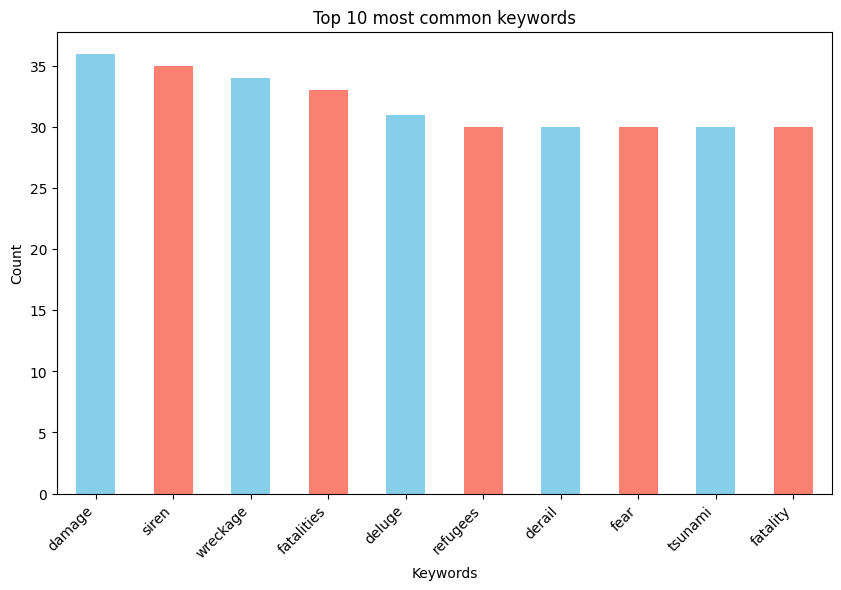

In [677]:
keyword_frequency = train['keyword'].value_counts()
print("\nFrequency of Keywords in Training Set:")
print(keyword_frequency.head(10))
plt.figure(figsize=(10, 6))
keyword_frequency.iloc[1:].head(10).plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.title('Top 10 most common keywords')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## Q3 (1pt)

Join text columns in a new column and delete the column with id.

In [678]:
data['concat'] = data['keyword'] + data['location'] + data['text']
data.drop(['id', 'keyword', 'location', 'text'], axis=1, inplace=True)

train, validation = train_test_split(data, test_size=0.3, random_state=42)
validation, test = train_test_split(validation, test_size=0.4, random_state=42)

In [679]:
train.head()

,target,concat
1186,0,bridge%20collapseAshes 2015: AustraliaÛªs col...
4071,1,"hailCarol Stream, IllinoisGREAT MICHIGAN TECHN..."
5461,1,policeHouston CNN: Tennessee movie theater sho...
5787,1,riotingStill rioting in a couple of hours left...
7445,0,woundsLake HighlandsCrack in the path where I ...


## Q4 (1pt)

Work with train set.

1. Transform the data using CountVectorizer.
2. What is the shape of the resulted matrix?


In [680]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X_train_transformed = vec.fit_transform(train['concat'])
X_train_transformed.shape

(5329, 22738)

## Q5 (2pt)

The matrix in the previous question has many columns. Let's take a look at the dictionary of tokens, method *.vocabulary_* of CountVectorizer object.

1. Find all the words in this dictionary that contain digits. How many such words were found?

2. Find all the words that contain punctuation characters. How many such words were found?

In [681]:
import re

In [682]:
word_list = list(vec.vocabulary_)

In [683]:
digit_pattern = re.compile(r'\d')
punctuation_pattern = re.compile(r'\W')

words_with_digit = []
words_with_punctuation = []

for word in word_list:
  if (digit_pattern.search(word)):
    words_with_digit.append(word)

  if (punctuation_pattern.search(word)):
    words_with_punctuation.append(word)


print(f"{len(words_with_digit)} words have digits: {words_with_digit}")
print(f"{len(words_with_punctuation)} words have punctuation characters: {words_with_punctuation}")

4590 words have digits: ['20collapseashes', '2015', '60', 't5trhjuau0', 'b1g', 'bmurph1019', 'termn8r13', 'oaskgki6qj', 'di8elzswnr', '20accidentsomewhere', 'tagzbcxfj0', 'xxfk4khbiw', 'mkx6ux4ozt', 'ma4ra7atql', 'cg579wldne', '7xglah10zl', 'musbik7ejf', '20bagnew', '35', '23', '419', 'hcdiwe5flc', 'roughdeal1', 'bloody65', '11', '20bombingprincipality', 'jackmulholland1', 'czdw8oowa2', 'zl7ojdaj3u', 'lkjfabqzb3', '20burninggo', '1acd4900c1424d1', '20firesnicola', 'ns1aggfnxz', '3m', 'od250zshfy', 'wd9odwjj9l', '20on', '20fireuk', 'tweetlikeitsseptember11th2001', '20spillnew', '20firescartoon', 'ks100', '7o4lnfbe7k', '20respondersthis', 'tl93aod3er', '20', 'obix79ncxn', 'z8r6r3nbtb', 'namffldh5h', '53inch', '300w', '4x4', 'o097vsotxk', 'i23xy7iejj', '00', '06', 'thhjjw51pe', '01', '325ci', '5l', 'l6', 'c211hise0r', '10', 'xbznu0qkvs', 'jlczidz7vu', 'mylittlepwnies3', '80s', 'lhw4vtbhzg', 'yh5vetm0yz', '17wgug8z0m', '073izwx0lb', 'delhi18', 'e7fn5g5ruu', '75k', '52k', 'shhlv4dplz', '20s

## Q6 (1pt)

During the lecture, we learned that there is a special text tokenizer in NLTK called *TweetTokenizer.* Let's try to apply *CountVectorizer* with this tokenizer. Answer all the questions from the previous section using TweetTokenizer and compare the results.

In [684]:
from nltk.tokenize import TweetTokenizer
from nltk import tokenize
import string

In [685]:
tw = TweetTokenizer()

In [686]:
words_with_digit = []
words_with_punctuation = []

for word in word_list:
  tokens = tw.tokenize(word)

  for token in tokens:
    if digit_pattern.search(token):
      words_with_digit.append(token)

    if punctuation_pattern.search(token):
      words_with_punctuation.append(token)

print(f"{len(words_with_digit)} words have digits: {words_with_digit}")
print(f"{len(words_with_punctuation)} words have punctuation characters: {words_with_punctuation}")

4605 words have digits: ['20collapseashes', '2015', '60', 't5trhjuau0', 'b1g', '1019', '8r13', '6qj', 'di8elzswnr', '20accidentsomewhere', '0', '4khbiw', '6ux4ozt', 'ma4ra7atql', 'cg579wldne', '7xglah10zl', '7ejf', '20bagnew', '35', '23', '419', '5flc', '1', '65', '11', '20bombingprincipality', '1', '8oowa2', 'zl7ojdaj3u', '3', '20burninggo', '1acd4900c1424d1', '20firesnicola', 'ns1aggfnxz', '3m', 'od250zshfy', 'wd9odwjj9l', '20on', '20fireuk', '11th2001', '20spillnew', '20firescartoon', 'ks100', '7o4lnfbe7k', '20respondersthis', 'tl93aod3er', '20', '79ncxn', 'z8r6r3nbtb', '5h', '53inch', '300w', '4x4', 'o097vsotxk', 'i23xy7iejj', '00', '06', '51pe', '01', '325ci', '5l', 'l6', 'c211hise0r', '10', '0qkvs', '7vu', '3', '80s', '4vtbhzg', 'yh5vetm0yz', '17wgug8z0m', '073izwx0lb', '18', 'e7fn5g5ruu', '75k', '52k', '4dplz', '20stormi', 'sf5jdnvdw9', '20wavefort', 'k9airfq3ql', '20reactordenver', 'ys3nmwwyvc', '7q3', '3mtho', '1auzb18', '40', '59wvom', 'z3ke_sk1', '20buildingswhiterun', '6ds6

## Q7 (4pt)

In scikit-learn, we can evaluate the process of counting matrices using CountVectorizer. CountVectorizer, like other inheritors of the _VectorizerMixin, has arguments tokenizer and preprocessor. The preprocessor is applied at the very beginning to each line of your dataset, while the tokenizer should take a string and return tokens.

Let's write a custom tokenizer that will do everything we need:

1. Convert all letters to lowercase.
2. Split the text into tokens using *TweetTokenizer* from the *nltk* package.
3. Remove all tokens that contain non-Latin characters, except for emojies (we'll consider tokens containing only punctuation and at least one parenthesis as emoticons) and hashtags that contain only Latin letters after the initial #.
4. Remove all tokens listed in nltk.corpus.stopwords.words('english').
5. Perform stemming using *SnowballStemmer.*

Demonstrate the operation of your function on the first text in the training dataset. You can access it by *.iloc[0]*

Usefull site on regular expressions: https://regex101.com/

In [687]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from string import punctuation
from string import ascii_lowercase as latin_letters

In [688]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [689]:
stemmer = SnowballStemmer('english')

In [690]:
def custom_tokenizer(text):
    # Lowercase transformation
    text = text.lower()

    # Tokenize using TweetTokenizer
    tokens = tw.tokenize(text)

    # Filter tokens based on criteria
    filtered_tokens = []
    for token in tokens:
      if (token.startswith('#') and all(char in latin_letters for char in token[1:])):
          filtered_tokens.append(token)

      else:
        emoticon_flag = False
        for char in token:
          if char == ')' or char == '(':
            emoticon_flag = True

          if char not in punctuation:
            emoticon_flag = False
            break

        if (emoticon_flag):
          filtered_tokens.append(token)

        if (all(char in latin_letters for char in token)):
          filtered_tokens.append(token)

        # Keep tokens that contain only Latin characters, "smileys", or valid hashtags


    # Remove stopwords and stem
    stopwords_list = stopwords.words('english')
    for token in filtered_tokens:
      if token in stopwords_list:
        filtered_tokens.remove(token)
      else:
        stemmer.stem(token)

    return filtered_tokens

In [691]:
print(train.iloc[0]['concat'])

bridge%20collapseAshes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0


In [692]:
returned_tokens = custom_tokenizer(train.iloc[0]['concat'])
print(returned_tokens)

['bridge', 'australia', 'collapse', 'trent', 'bridge', 'among', 'worst', 'history', 'england', 'bundled', 'australia']


## Q8 (2pt)

1. Apply *CountVectorizer* with your tokenizer to the Train and Validation sets.
2. Train *LogisticRegression* on the features obtained.
3. Calculate f1-score on the validation set.

In [693]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import MaxAbsScaler

In [694]:
def visualize(clf, feature_names, n_features=25): #use function for our homework
  coef = clf.coef_.ravel()
  positive_coef = np.argsort(coef)[-n_features:]
  negative_coef = np.argsort(coef)[:n_features]
  all_coefs = np.hstack([negative_coef, positive_coef])

  plt.figure(figsize=(15,5))
  colors = ['red' if c<0 else 'blue' for c in coef[all_coefs]]
  plt.bar(np.arange(2*n_features), coef[all_coefs], color=colors)
  feature_names = np.array(feature_names)
  plt.xticks(np.arange(1,1+2*n_features), feature_names[all_coefs], rotation =60, ha='right')

In [695]:
vec = CountVectorizer(tokenizer=custom_tokenizer)

X_train_transformed = vec.fit_transform(train['concat'])
y_train = train['target']

X_validation_transformed = vec.transform(validation['concat'])
y_validation = validation['target']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [696]:
clf = LogisticRegression(max_iter=200, random_state=42)

In [697]:
clf.fit(X_train_transformed, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [698]:
y_pred_validation = clf.predict(X_validation_transformed)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       807
           1       0.76      0.71      0.73       563

    accuracy                           0.79      1370
   macro avg       0.78      0.78      0.78      1370
weighted avg       0.79      0.79      0.79      1370

F1-score on validation set: 0.7317972350230414


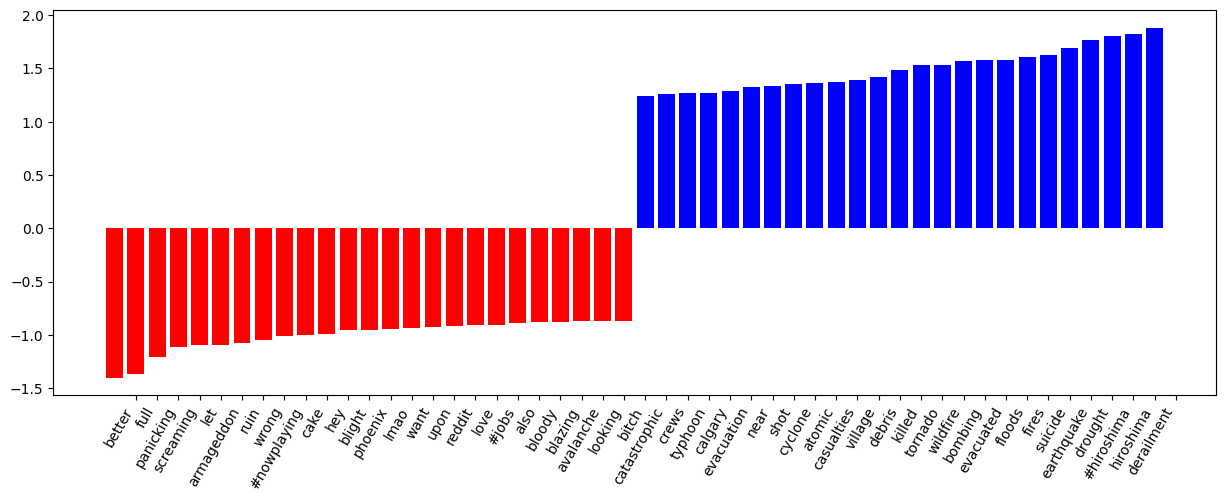

In [699]:
print(classification_report(y_validation, y_pred_validation))
print("F1-score on validation set:", f1_score(y_validation, y_pred_validation))
visualize(clf, vec.get_feature_names_out())

## Q9 (2pt)

1. Repeat Q8, but with a TF-IDF vectorizer. How did the quality change?

2. We can further reduce the size of our matrix by discarding *df* values close to one. Most likely, such words do not carry much information about the category since they occur quite frequently. Limit the maximum df in the parameters of TfIdfVectorizer, set the upper limit to 0.9. How did the matrix size change, and how did the quality change?

3. We can also reduce the size of the matrix by removing words with very small *df* values. Were you able to improve the quality by doing this?

In [700]:
from sklearn.feature_extraction.text import TfidfVectorizer

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.89      0.84       807
           1       0.81      0.67      0.73       563

    accuracy                           0.80      1370
   macro avg       0.80      0.78      0.79      1370
weighted avg       0.80      0.80      0.80      1370

F1-score on validation set: 0.7334630350194553


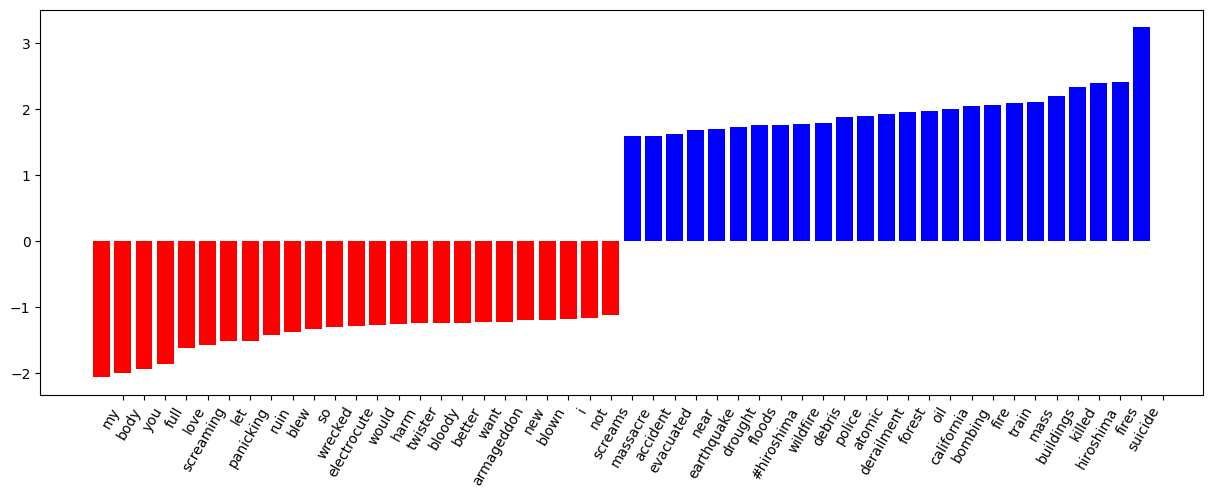

In [701]:
vec = TfidfVectorizer(tokenizer=custom_tokenizer)

X_train_transformed = vec.fit_transform(train['concat'])
y_train = train['target']

X_validation_transformed = vec.transform(validation['concat'])
y_validation = validation['target']

clf = LogisticRegression(max_iter=200, random_state=42)

clf.fit(X_train_transformed, y_train)

y_pred_validation = clf.predict(X_validation_transformed)

print(classification_report(y_validation, y_pred_validation))
print("F1-score on validation set:", f1_score(y_validation, y_pred_validation))
visualize(clf, vec.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.89      0.84       807
           1       0.81      0.67      0.73       563

    accuracy                           0.80      1370
   macro avg       0.80      0.78      0.79      1370
weighted avg       0.80      0.80      0.80      1370

F1-score on validation set: 0.7334630350194553


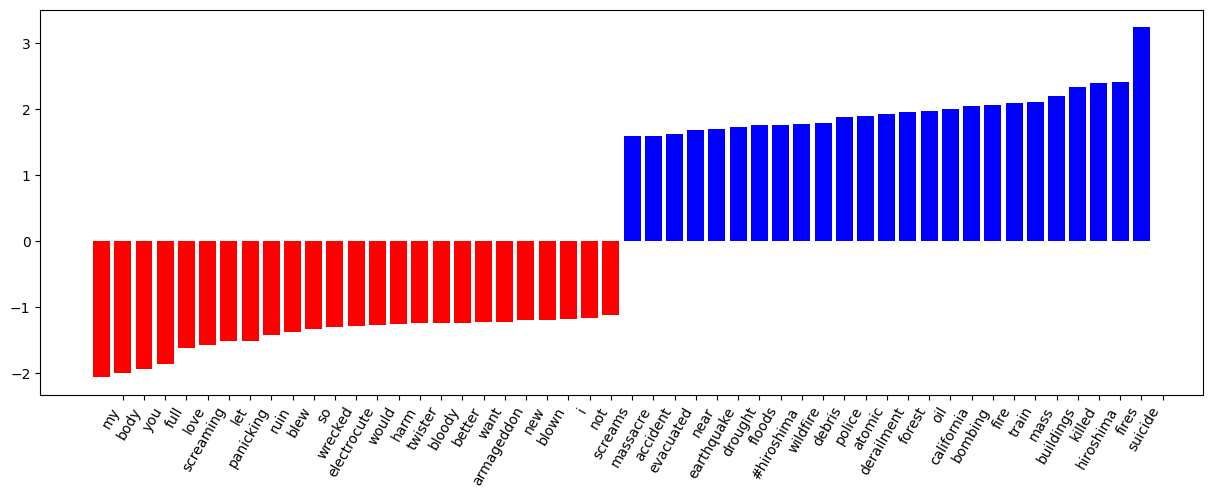

In [702]:
vec = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)

X_train_transformed = vec.fit_transform(train['concat'])
y_train = train['target']

X_validation_transformed = vec.transform(validation['concat'])
y_validation = validation['target']

clf = LogisticRegression(max_iter=200, random_state=42)

clf.fit(X_train_transformed, y_train)

y_pred_validation = clf.predict(X_validation_transformed)

print(classification_report(y_validation, y_pred_validation))
print("F1-score on validation set:", f1_score(y_validation, y_pred_validation))
visualize(clf, vec.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.86      0.83       807
           1       0.78      0.68      0.72       563

    accuracy                           0.79      1370
   macro avg       0.78      0.77      0.78      1370
weighted avg       0.79      0.79      0.79      1370

F1-score on validation set: 0.7246925260170293


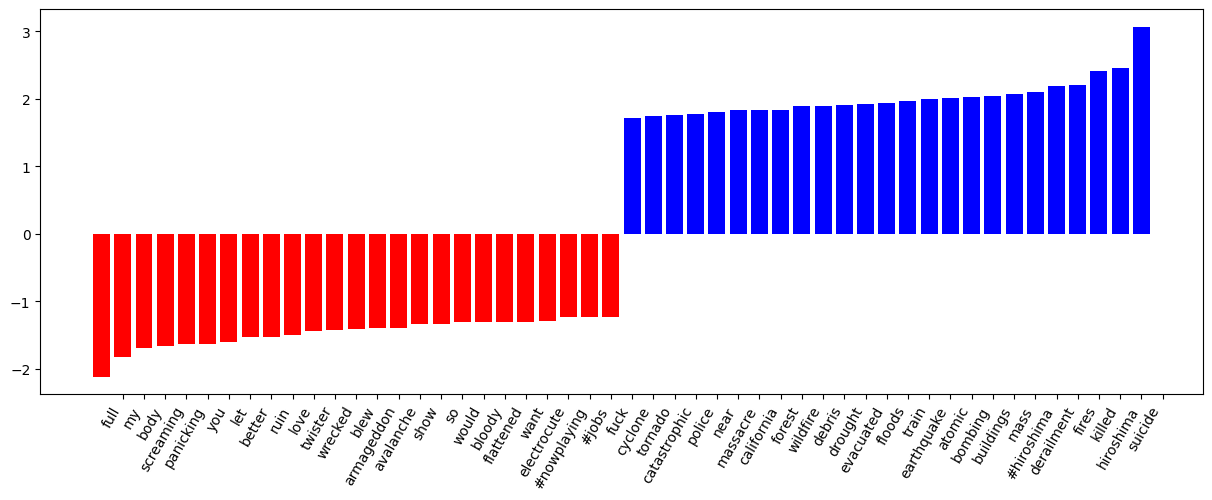

In [703]:
vec = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9, min_df = 0.001)

X_train_transformed = vec.fit_transform(train['concat'])
y_train = train['target']

X_validation_transformed = vec.transform(validation['concat'])
y_validation = validation['target']

clf = LogisticRegression(max_iter=200, random_state=42)

clf.fit(X_train_transformed, y_train)

y_pred_validation = clf.predict(X_validation_transformed)

print(classification_report(y_validation, y_pred_validation))
print("F1-score on validation set:", f1_score(y_validation, y_pred_validation))
visualize(clf, vec.get_feature_names_out())

In [704]:



# vec = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9, min_df = 0.1)

# X_train_transformed = vec.fit_transform(train['concat'])
# y_train = train['target']

# X_validation_transformed = vec.transform(validation['concat'])
# y_validation = validation['target']

# X_test_transformed = vec.transform(test['concat'])
# y_test = test['concat']

# clf = LogisticRegression(max_iter=200, random_state=42)

# clf.fit(X_train_transformed, y_train)

# y_pred_validation = clf.predict(X_validation_transformed)
# y_pred_test = clf.predict(X_test_transformed)

# print(classification_report(y_validation, y_pred_validation))

## Q10 (2pt)

Evaluate the best model. The minimal value of f1-score on the Test data should be at least 0.75.

In [705]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [706]:
# Create a pipeline with CountVectorizer and LogisticRegression
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)),
    ('classifier', LogisticRegression())
])

# Define the parameter grid
param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],   # Consider unigrams and bigrams
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],    # Regularization parameter
    'classifier__solver': ['liblinear', 'saga']     # Solver for logistic regression        # Solver for logistic regression
}

In [710]:
# Create a logistic regression classifier
logistic_regression_model = LogisticRegression()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_transformed, y_train)

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict labels for validation set using the best model
y_pred_validation = best_model.predict(X_validation_transformed)

# Calculate F1-score on the validation set using the best model
f1_score_validation = f1_score(y_validation, y_pred_validation)

print("F1-score on validation set with best model:", f1_score_validation)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

## Q11 (2pt)
Visualize the most important features.

In [ ]:
#use grid searhc.get(featurenamesout) on bar plot